<a href="https://colab.research.google.com/github/Omarrhussain/ML_Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize

In [ ]:
df = pd.read_csv('/content/SongPopularity.csv')
df.head(10)

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
0,I Need You,I Need You,1/30/2001,['LeAnn Rimes'],"['country dawn', 'contemporary country', 'coun...",2000,44,229826,https://open.spotify.com/track/046MBhhgQJJghnb...,https://i.scdn.co/image/ab67616d00001e025cf523...,...,0.736,0.000096,0.1180,-7.124,0.0367,144.705,0.5640,7,1,4
1,Sweet Lady,Tyrese,8/31/1998,['Tyrese'],"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600,https://open.spotify.com/track/1Dx8rIZaXzZPvUQ...,https://i.scdn.co/image/ab67616d00001e0283422e...,...,0.522,0.000000,0.2400,-6.254,0.0383,66.024,0.5840,9,0,4
2,You Take My Breath Away - Mono Version,Sooner or Later,1979,['Rex Smith'],['bubblegum pop'],1979,86,197453,https://open.spotify.com/track/3BCMsz55asr7Yr6...,https://i.scdn.co/image/ab67616d00001e02d1741c...,...,0.600,0.000026,0.5230,-7.913,0.0357,141.912,0.2720,11,1,4
3,If I Give My Heart to You (with The Mellomen),Golden Girl (The Columbia Recordings 1944-1966),1945,"['Doris Day', 'The Mellomen']","['adult standards', 'easy listening', 'movie t...",1954,20,169066,https://open.spotify.com/track/20G1XJaTwIm2Iuw...,https://i.scdn.co/image/ab67616d00001e02f2ee02...,...,0.059,0.000000,0.1030,-16.131,0.0497,76.642,0.3310,9,1,4
4,Don't Forget About Us (As Made Famous By Maria...,Drew's Famous # 1 Karaoke Hits: Sing the Hits ...,8/16/2011,['The Karaoke Crew'],['karaoke'],2006,50,251013,https://open.spotify.com/track/28BSc2ZmO0Oe3iv...,https://i.scdn.co/image/ab67616d00001e02b0d3e3...,...,0.348,0.001280,0.2470,-10.669,0.0545,143.595,0.3850,7,0,4
5,Always,Cross Road,10/18/1994,['Bon Jovi'],"['glam metal', 'rock']",1995,17,353026,https://open.spotify.com/track/2RChe0r2cMoyOvu...,https://i.scdn.co/image/ab67616d00001e025f66fb...,...,0.659,0.000000,0.0778,-5.558,0.0312,140.795,0.3270,4,1,4
6,I Saw Red,Cherry Pie (Expanded Edition),5/1/1990,['Warrant'],"['glam metal', 'album rock', 'hard rock']",1991,96,226920,https://open.spotify.com/track/5Kz1hj2NNSsgf0Y...,https://i.scdn.co/image/ab67616d00001e02a68640...,...,0.677,0.000000,0.3810,-6.139,0.0271,84.879,0.4370,4,0,4
7,Hands Clean,Under Rug Swept,2/25/2002,['Alanis Morissette'],"['canadian singer-songwriter', 'neo mellow', '...",2002,95,269400,https://open.spotify.com/track/2LVxvGhl2U5p2ql...,https://i.scdn.co/image/ab67616d00001e02d78336...,...,0.820,0.000003,0.5040,-5.428,0.0299,99.952,0.5200,7,1,4
8,Here (In Your Arms),Zombies! Aliens! Vampires! Dinosaurs!,8/8/2006,['Hellogoodbye'],"['pop punk', 'neon pop punk']",2007,81,240546,https://open.spotify.com/track/1GV98LUEVk1U3LW...,https://i.scdn.co/image/ab67616d00001e02c361d9...,...,0.607,0.001730,0.2720,-6.804,0.0359,126.045,0.7740,5,1,4
9,One More Try - Remastered,Faith,10/30/1987,['George Michael'],['new wave pop'],1988,11,350666,https://open.spotify.com/track/5932kbyNt445gDT...,https://i.scdn.co/image/ab67616d00001e02b7a9a6...,...,0.291,0.000038,0.1100,-12.544,0.0283,119.005,0.0823,5,1,3


In [ ]:
print(df.isnull().sum())

Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
# Loop through each column in the DataFrame object
for col in df.columns:
    # Check if the column is categorical
    if df[col].dtype == 'object':
        # Count the number of unique categories in the column
        num_categories = len(df[col].unique())
        print(f"{col} has {num_categories} categories")

Song has 5694 categories
Album has 4520 categories
Album Release Date has 2428 categories
Artist Names has 3104 categories
Artist(s) Genres has 2231 categories
Spotify Link has 5918 categories
Song Image has 4666 categories
Spotify URI has 5918 categories


In [ ]:
#label encoding
# Create an instance of the LabelEncoder class
le = LabelEncoder()
# Apply label encoding to a specific categorical column
df.drop('Song', axis=1, inplace=True)

In [ ]:
# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Split the 'Artist Genres' column by comma and expand it into a new DataFrame
artist_genres_df = df['Artist(s) Genres'].str.split(',', expand=True)
artist_names_df = df['Artist Names'].str.split(',', expand=True)
# Apply label encoding to each split column
for col in artist_genres_df.columns:
    artist_genres_df[col] = le.fit_transform(artist_genres_df[col])
for col in artist_names_df.columns:
    artist_names_df[col] = le.fit_transform(artist_names_df[col])

# Drop the original 'Artist(s) Genres' column
df.drop('Artist(s) Genres', axis=1, inplace=True)
df.drop('Artist Names', axis=1, inplace=True)
# Sum the encoded values for each row and store them in a new column
df['Artist Genres Encoded'] = artist_genres_df.sum(axis=1)
df['Artist Names Encoded'] = artist_names_df.sum(axis=1)
# Print the first five rows of the updated DataFrame
df.head(5)


,Album,Album Release Date,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,Spotify URI,Popularity,Acousticness,...,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,Artist Genres Encoded,Artist Names Encoded
0,I Need You,1/30/2001,2000,44,229826,https://open.spotify.com/track/046MBhhgQJJghnb...,https://i.scdn.co/image/ab67616d00001e025cf523...,spotify:track:046MBhhgQJJghnbgZCkaAR,62,0.0200,...,0.118,-7.124,0.0367,144.705,0.564,7,1,4,1538,2377
1,Tyrese,8/31/1998,1999,43,290600,https://open.spotify.com/track/1Dx8rIZaXzZPvUQ...,https://i.scdn.co/image/ab67616d00001e0283422e...,spotify:track:1Dx8rIZaXzZPvUQRF2j9hB,63,0.2330,...,0.240,-6.254,0.0383,66.024,0.584,9,0,4,2159,3610
2,Sooner or Later,1979,1979,86,197453,https://open.spotify.com/track/3BCMsz55asr7Yr6...,https://i.scdn.co/image/ab67616d00001e02d1741c...,spotify:track:3BCMsz55asr7Yr6DqB9N8D,49,0.4760,...,0.523,-7.913,0.0357,141.912,0.272,11,1,4,2463,2916
3,Golden Girl (The Columbia Recordings 1944-1966),1945,1954,20,169066,https://open.spotify.com/track/20G1XJaTwIm2Iuw...,https://i.scdn.co/image/ab67616d00001e02f2ee02...,spotify:track:20G1XJaTwIm2IuwA3Pjg1d,43,0.9730,...,0.103,-16.131,0.0497,76.642,0.331,9,1,4,1731,1586
4,Drew's Famous # 1 Karaoke Hits: Sing the Hits ...,8/16/2011,2006,50,251013,https://open.spotify.com/track/28BSc2ZmO0Oe3iv...,https://i.scdn.co/image/ab67616d00001e02b0d3e3...,spotify:track:28BSc2ZmO0Oe3iv4mFdedS,0,0.0149,...,0.247,-10.669,0.0545,143.595,0.385,7,0,4,2655,3398


In [ ]:
# Apply label encoding to a specific categorical column
df['album'] = le.fit_transform(df['Album'])
df.drop('Album', axis=1, inplace=True)

df['album Release Date'] = le.fit_transform(df['Album Release Date'])
df.drop('Album Release Date', axis=1, inplace=True)

df['spotify Link'] = le.fit_transform(df['Spotify Link'])
df.drop('Spotify Link', axis=1, inplace=True)

df['song Image'] = le.fit_transform(df['Song Image'])
df.drop('Song Image', axis=1, inplace=True)

df['spotify URI'] = le.fit_transform(df['Spotify URI'])
df.drop('Spotify URI', axis=1, inplace=True)

In [ ]:
# prompt: Standardize or normalize the numerical features in the dataset to ensure they have a similar scale and contribute equally to the model. This can be done using techniques like StandardScaler or MinMaxScaler.

from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the scaler to the numerical features in the dataset
numerical_features = df[['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]
scaler.fit(numerical_features)

# Transform the numerical features using the fitted scaler
scaled_features = scaler.transform(numerical_features)

# Replace the original numerical features with the scaled features
df[['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']] = scaled_features


Columns with outliers:
Index(['Hot100 Ranking Year', 'Song Length(ms)', 'Popularity', 'Acousticness',
       'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo', 'Valence', 'Time Signature',
       'Artist Genres Encoded', 'Artist Names Encoded'],
      dtype='object')


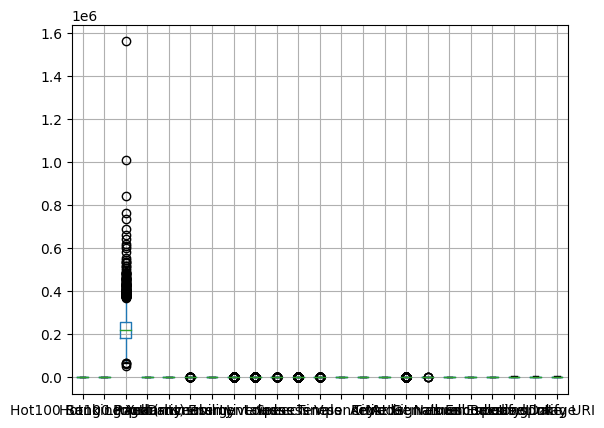

In [ ]:
# Visualize the data using box plots
df.boxplot()

# Calculate summary statistics
summary_stats = df.describe()

# Calculate Z-scores for each column
z_scores = (df - df.mean()) / df.std()

# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using Z-score or IQR methods
zscore_threshold = 2  # Adjust the threshold as needed
iqr_multiplier = 1.5  # Adjust the multiplier as needed

# Identify outliers using Z-score
zscore_outliers = (z_scores > zscore_threshold) | (z_scores < -zscore_threshold)

# Identify outliers using IQR
iqr_outliers = (df < (Q1 - iqr_multiplier * IQR)) | (df > (Q3 + iqr_multiplier * IQR))

# Find columns with outliers
columns_with_outliers = df.columns[zscore_outliers.any() | iqr_outliers.any()]

# Print the columns with outliers
print("Columns with outliers:")
print(columns_with_outliers)

In [ ]:
for column_name in columns_with_outliers:
      # Calculate the Z-score for the column
      z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()

      # Set the Z-score threshold for outliers
      zscore_threshold = 2

      # Identify and replace outliers
      df[column_name] = np.where(np.abs(z_scores) > zscore_threshold, df[column_name].median(), df[column_name])

      # Print the modified column
      print(df[column_name])

0       2000.0
1       1999.0
2       1979.0
3       1954.0
4       2006.0
         ...  
6186    1991.0
6187    2006.0
6188    2006.0
6189    2008.0
6190    1962.0
Name: Hot100 Ranking Year, Length: 6191, dtype: float64
0       229826.0
1       290600.0
2       197453.0
3       169066.0
4       251013.0
          ...   
6186    298691.0
6187    303053.0
6188    231866.0
6189    258826.0
6190    143826.0
Name: Song Length(ms), Length: 6191, dtype: float64
0       0.366445
1       0.412936
2      -0.237936
3      -0.516882
4       0.180482
          ...   
6186    0.087500
6187    0.784863
6188    0.273463
6189    0.970827
6190   -0.005482
Name: Popularity, Length: 6191, dtype: float64
0      -0.962053
1      -0.230370
2       0.604366
3      -0.360905
4      -0.979572
          ...   
6186   -0.990908
6187   -0.381516
6188   -0.130751
6189   -0.959305
6190    0.185280
Name: Acousticness, Length: 6191, dtype: float64
0      -0.891087
1      -0.189494
2      -1.943475
3      -0.731634
4 

In [ ]:
string_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
df = pd.get_dummies(df, columns=string_columns,drop_first=True)
for col in string_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,...,Key,Mode,Time Signature,Artist Genres Encoded,Artist Names Encoded,album,album Release Date,spotify Link,song Image,spotify URI
0,2000.0,44,229826.0,0.366445,-0.962053,-0.891087,0.677081,-0.268871,-0.418374,0.422517,...,7,1,4.0,1538.0,2377.0,1744,157,53,1665,53
1,1999.0,43,290600.0,0.412936,-0.230370,-0.189494,-0.364437,-0.269432,0.394977,0.653006,...,9,0,4.0,2159.0,3610.0,4196,2177,928,2353,928
2,1979.0,86,197453.0,-0.237936,0.604366,-1.943475,0.015182,-0.269282,-0.385040,0.213487,...,11,1,4.0,2463.0,2916.0,3240,868,2351,3786,2351
3,1954.0,20,169066.0,-0.516882,-0.360905,-0.731634,0.088185,-0.269432,-0.518376,-1.963708,...,9,1,4.0,1731.0,1586.0,1444,814,1503,4402,1503
4,2006.0,50,251013.0,0.180482,-0.979572,1.436925,-1.211280,-0.261933,0.441644,-0.516660,...,7,0,4.0,2655.0,3398.0,1095,2073,1609,3199,1609


In [ ]:
df.drop(['album','spotify Link', 'song Image', 'spotify URI'], axis=1, inplace=True)
df.head()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,Artist Genres Encoded,Artist Names Encoded,album Release Date
0,2000.0,44,229826.0,0.366445,-0.962053,-0.891087,0.677081,-0.268871,-0.418374,0.422517,-0.445931,0.910484,-0.133477,7,1,4.0,1538.0,2377.0,157
1,1999.0,43,290600.0,0.412936,-0.230370,-0.189494,-0.364437,-0.269432,0.394977,0.653006,-0.425741,-1.877434,-0.050882,9,0,4.0,2159.0,3610.0,2177
2,1979.0,86,197453.0,-0.237936,0.604366,-1.943475,0.015182,-0.269282,-0.385040,0.213487,-0.458550,0.811519,-1.339353,11,1,4.0,2463.0,2916.0,868
3,1954.0,20,169066.0,-0.516882,-0.360905,-0.731634,0.088185,-0.269432,-0.518376,-1.963708,-0.281886,-1.501204,-1.095700,9,1,4.0,1731.0,1586.0,814
4,2006.0,50,251013.0,0.180482,-0.979572,1.436925,-1.211280,-0.261933,0.441644,-0.516660,-0.221315,0.871153,-0.872695,7,0,4.0,2655.0,3398.0,2073


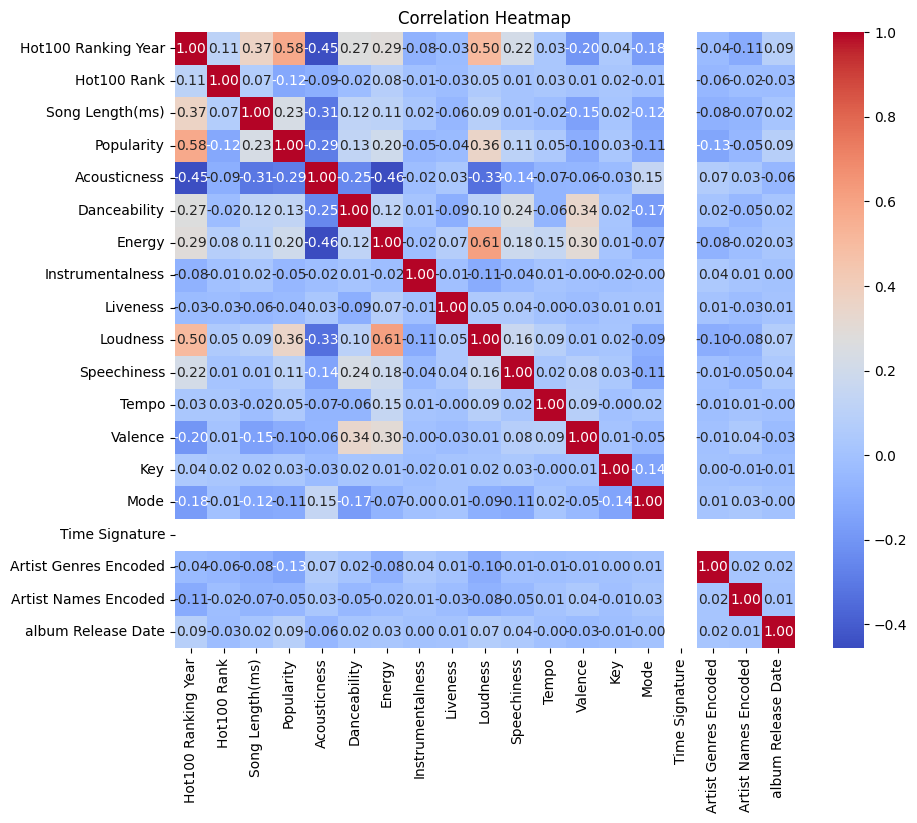

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X_train = df[["Hot100 Ranking Year", "Loudness","Energy","album Release Date","Artist Genres Encoded"]] #Feature Selection => 3 Features
X_test = df[["Hot100 Ranking Year", "Loudness","Energy","album Release Date","Artist Genres Encoded"]]
Y = df['Popularity'].values

In [ ]:
# 80 % Train , 20 % Test
X_train, X_test, y_train, y_test = train_test_split(X_train, Y, test_size = 0.2, shuffle = True,random_state = 42)

In [ ]:
# prompt: i want to apply linear regression and polynomial regression and calculate mean squared error and accuarcy

# Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict on test data
y_pred = reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

# Calculate Accuracy
accuracy = reg.score(X_test, y_test)
print("Linear Regression Accuracy:", accuracy*100 ,'%')

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

# Create a polynomial features object with degree 3
poly_features = PolynomialFeatures(degree=3)

# Transform the training and testing data
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train a linear regression model on the transformed data
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on test data
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Polynomial Regression MSE:", mse_poly)

# Calculate Accuracy
accuracy_poly = poly_model.score(X_test_poly, y_test)
print("Polynomial Regression Accuracy:", accuracy_poly * 100 ,'%')

Linear Regression MSE: 0.39728976694518847
Linear Regression Accuracy: 36.4795803443655 %
Polynomial Regression MSE: 0.3903015364691837
Polynomial Regression Accuracy: 37.59688909334054 %
